<a href="https://colab.research.google.com/github/muzflex/Keras-Classification/blob/main/Keras_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/ML Projects/Datasets/DATA/cancer_classification.csv')

In [ ]:
# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


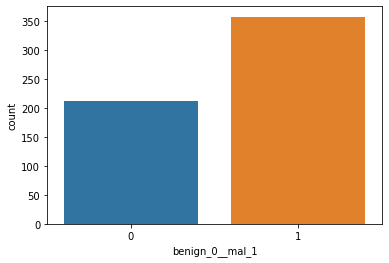

In [ ]:
sns.countplot(x='benign_0__mal_1', data=df)

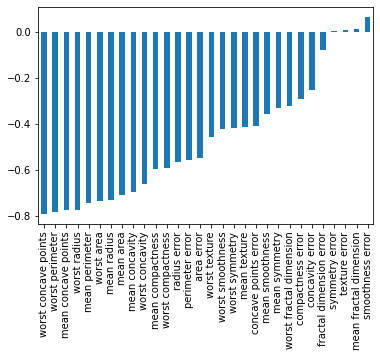

In [ ]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

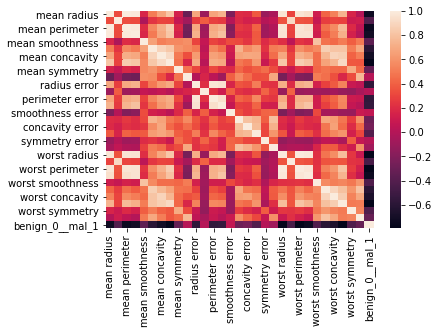

In [ ]:
sns.heatmap(df.corr())

In [ ]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# To prevent data leakage
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.fit_transform(X_test)

In [ ]:
# Model Creation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
X_train.shape

(426, 30)

In [ ]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
# TRAINING MODEL

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 13ms/step - loss: 0.6928 - val_loss: 0.6808
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6640 - val_loss: 0.6529
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6320 - val_loss: 0.6166
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5955 - val_loss: 0.5770
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5574 - val_loss: 0.5332
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5181 - val_loss: 0.4862
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4746 - val_loss: 0.4389
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4268 - val_loss: 0.3854
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3825 - val_loss: 0.3402
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3416 - val_loss: 0.2963
Epoch 11

In [ ]:
#PLOT

In [ ]:
losses = pd.DataFrame(model.history.history)

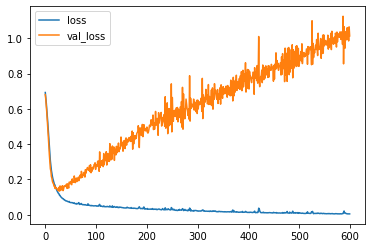

In [ ]:
losses.plot()

In [ ]:
# Model is overfitting, training to much epochs

In [ ]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6888 - val_loss: 0.6978
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6570 - val_loss: 0.6651
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6220 - val_loss: 0.6424
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5864 - val_loss: 0.6044
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5486 - val_loss: 0.5613
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5092 - val_loss: 0.5186
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4681 - val_loss: 0.4729
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.4264 - val_loss: 0.4239
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3838 - val_loss: 0.3744
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3424 - val_loss: 0.3286
Epoch 11/

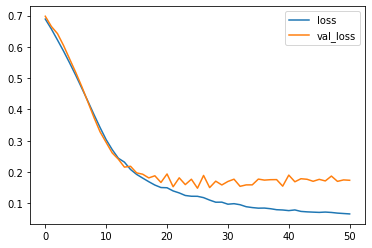

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
          callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7210 - val_loss: 0.6885
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.7146 - val_loss: 0.6730
Epoch 3/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6870 - val_loss: 0.6588
Epoch 4/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6615 - val_loss: 0.6444
Epoch 5/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6534 - val_loss: 0.6250
Epoch 6/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6358 - val_loss: 0.6035
Epoch 7/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6287 - val_loss: 0.5825
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.6153 - val_loss: 0.5572
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5731 - val_loss: 0.5294
Epoch 10/600
14/14 [==============================] - 0s 3ms/step - loss: 0.5704 - val_loss: 0.5004
Epoch 11/

In [ ]:
model_loss = pd.DataFrame(model.history.history)

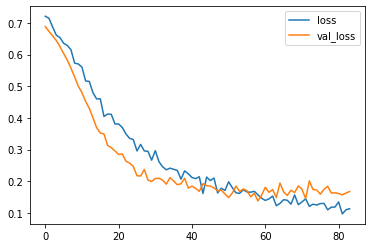

In [ ]:
model_loss.plot()

In [ ]:
# EVALUATION

In [ ]:
predictions = model.predict_classes(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        55
           1       0.99      0.90      0.94        88

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.94      0.93      0.93       143



In [ ]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 9 79]]
